In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/pressure.csv')
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2,2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
3,2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
4,2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [3]:
CITY = 'Seattle'
df_city = df[['datetime', CITY]]
df_city[CITY].isnull().value_counts()

False    45240
True        13
Name: Seattle, dtype: int64

In [4]:
missings = df_city[df_city[CITY].isnull()].index.values
df_city.iloc[missings]

,datetime,Seattle
0,2012-10-01 12:00:00,NaN
1426,2012-11-29 22:00:00,NaN
1643,2012-12-08 23:00:00,NaN
1644,2012-12-09 00:00:00,NaN
1733,2012-12-12 17:00:00,NaN
1734,2012-12-12 18:00:00,NaN
1737,2012-12-12 21:00:00,NaN
1738,2012-12-12 22:00:00,NaN
1739,2012-12-12 23:00:00,NaN
1740,2012-12-13 00:00:00,NaN


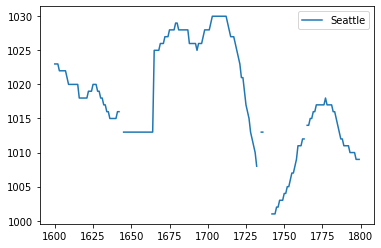

In [5]:
df_city.iloc[1600:1800].plot()

In [6]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
df_city[CITY].interpolate(inplace=True)

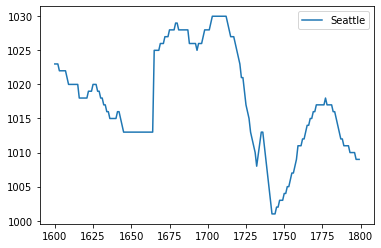

In [7]:
df_city.iloc[1600:1800].plot()

In [8]:
# El primer registro que tiene valor nan no se actualiza
df_city[df_city[CITY].isnull()]

,datetime,Seattle
0,2012-10-01 12:00:00,NaN


In [9]:
# Borrar nan
df_city[CITY].dropna(inplace=True)

In [10]:
df_city[CITY].isnull().value_counts()

False    45252
Name: Seattle, dtype: int64